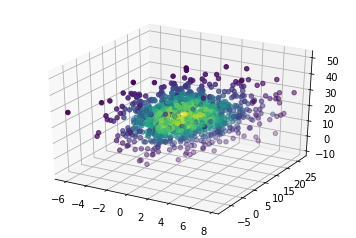

In [36]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,100000)
values = data.T

kde = stats.gaussian_kde(values)


In [51]:
data

array([[  2.57226259,  13.93065647,  37.76879578],
       [  3.2226865 ,  15.55671627,  12.76434925],
       [ -0.50033091,   6.24917265,  22.37520784],
       ..., 
       [ -1.51026045,   3.72434886,  31.04961843],
       [  4.59354513,  18.9838628 ,  25.38704646],
       [ -1.37316652,   4.06708359,  17.91079662]])

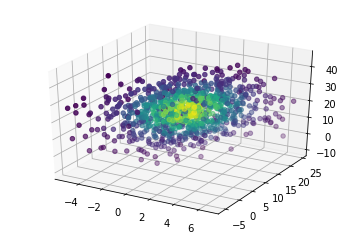

In [40]:
values = np.random.multivariate_normal(mu,sigma,1000).T
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [612]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/dr3_elg_like_masked_chunk21.fits'
import astropy.io.fits as fits
dat = fits.getdata(fn)

In [624]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sim_200per_0125.fits'
dat = fits.getdata(fn)

In [625]:
dat.columns

ColDefs(
    name = 'redshift'; format = 'D'
    name = 'g'; format = 'D'
    name = 'r'; format = 'D'
    name = 'z'; format = 'D'
    name = 'nn_redshift'; format = 'D'
    name = 'n'; format = 'D'
    name = 'id_sample'; format = '32A'
    name = 'rhalf'; format = 'D'
    name = 'id'; format = 'J'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ba'; format = 'D'
    name = 'pa'; format = 'D'
)

In [622]:
dat['brickid']

array([325875, 325875, 321555, ..., 341887, 341887, 341887], dtype=int32)

In [623]:
dat.columns

ColDefs(
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'blob'; format = 'J'
    name = 'ninblob'; format = 'I'
    name = 'tycho2inblob'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'
    name = 'ra_ivar'; format = 'E'
    name = 'dec'; format = 'D'
    name = 'dec_ivar'; format = 'E'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'bx0'; format = 'E'
    name = 'by0'; format = 'E'
    name = 'left_blob'; format = 'L'
    name = 'out_of_bounds'; format = 'L'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'
    name = 'cpu_source'; format = 'E'
    name = 'cpu_blob'; format = 'E'
    name = 'blob_width'; format = 'I'
    name = 'blob_height'; format = 'I'
    name = 'blob_npix'; format = 'J'
    name = 'blob_nimages'; format = 'I'
    name = 'blob_totalpix'; format = 'J'
    name = 'decam_flux'; format = '6E

In [586]:
dat_sel = dat[(dat['MCHUNK']==1)&(dat['VETOMASK']==1)]

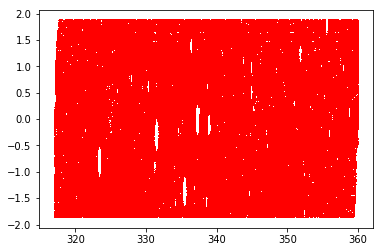

In [587]:
plt.plot(dat_sel['ra'],dat_sel['dec'],'r,')

In [588]:
from astropy.table import Table
tab = Table(dat_sel)

In [589]:
tab.write('dr3_el/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/g_like_masked_chunk21.fits')

FileNotFoundError: [Errno 2] No such file or directory: 'dr3_el/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/g_like_masked_chunk21.fits'

In [ ]:
def ELG_selection_for_dr3_02(tractor,region='sgc'):
    import numpy as n
    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825-0.2)&(g<22.825+0.2)&(-0.068*rz+0.457<gr+0.2)&(gr-0.2< 0.112*rz+0.773) &(0.218*gr+0.571<rz+0.2)&(rz-0.2<-0.555*gr+1.901)
    color_ngc = (g>21.825-0.2)&(g<22.9+0.2)  &(-0.068*rz+0.457<gr+0.2)&(gr-0.2< 0.112*rz+0.773) &(0.637*gr+0.399<rz+0.2)&(rz-0.2<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])

In [ ]:
def non_ELG_selection_for_dr3(dat,region='sgc'):
    # opens the tractor file
    import numpy as n
    from astropy.table import Table
    tractor=dat
    
    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
            return Table(tractor[selection_sgc.astype(bool)==False])
    if region == 'ngc':
            return Table(tractor[selection_ngc.astype(bool)==False])

In [ ]:
flag,dat_sel_2 = ELG_selection_for_dr3_02(dat_sel)

In [ ]:
dat_sel_2_non_ELG = non_ELG_selection_for_dr3(dat_sel_2)

In [ ]:
dat_sel_2_non_ELG.write('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/elg_like_contamination_chunk21.fits')

In [ ]:
set(dat['MCHUNK'])

In [ ]:
import numpy as np
np.vstack((dat['ra'],dat['dec']))

In [ ]:
def select_non_ELG( path_2_tractor_file , region = 'sgc'):
    import numpy as n
    """
    Given the path to a tractor catalog, it returns two sub catalogs with the eBOSS ELG selections applied (NGC and SGC).
    """
    # opens the tractor file
    hdu=fits.open(path_2_tractor_file)
    dat=hdu[1].data
    hdu.close()
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(dat['gflux'] / dat['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * n.log10(dat['rflux'] / dat['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * n.log10(dat['zflux'] / dat['mw_transmission_z'])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(color_sgc)
    selection_ngc =(color_ngc)
    # returns the catalogs of ELGs
    if region == 'sgc':
            return dat[selection_sgc==False]
    if region == 'ngc':
            return dat[selection_ngc==False]

In [ ]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn_sim = topdir+'sgc_run_sim_really_masked_chunk21.fits'
fn_sim_chunk22 = topdir+'sgc_run_sim_really_masked_chunk22.fits'
fn_sim_chunk23 = topdir+'my_ngc_run_sim_really_masked_chunk23.fits'

In [ ]:
Table(sim_non_ELG).write(topdir+'sgc_run_sim_contamination.fits',overwrite=True)

In [ ]:
#chunk21
fn_sim_chunk21 = topdir+'sgc_run_sim_really_masked_chunk21.fits'
sim = fits.getdata(fn_sim_chunk21)
sim_non_ELG = select_non_ELG(fn_sim_chunk21)
print(len(sim_non_ELG),len(sim),len(sim_non_ELG)/len(sim))
#Table(sim_non_ELG).write(topdir+'sgc_run_sim_contamination.fits',overwrite=True)

gs = 22.5 - 2.5 * np.log10(sim_non_ELG['gflux']/sim_non_ELG['mw_transmission_g'])
rs = 22.5 - 2.5 * np.log10(sim_non_ELG['rflux']/sim_non_ELG['mw_transmission_r'])
zs = 22.5 - 2.5 * np.log10(sim_non_ELG['zflux']/sim_non_ELG['mw_transmission_z'])
grs = gs-rs
rzs = rs-zs

gs21 = gs
grs21 = grs
rzs21 = rzs

In [ ]:
from astropy.table import Table
Table(sim_non_ELG).write(topdir+'sgc_run_sim_really_masked_chunk21_contamination.fits')

In [ ]:
#chunk22
fn_sim_chunk22 = topdir+'sgc_run_sim_really_masked_chunk22.fits'
sim = fits.getdata(fn_sim_chunk22)
sim_non_ELG = select_non_ELG(fn_sim_chunk22)
print(len(sim_non_ELG),len(sim),len(sim_non_ELG)/len(sim))


gs = 22.5 - 2.5 * np.log10(sim_non_ELG['gflux']/sim_non_ELG['mw_transmission_g'])
rs = 22.5 - 2.5 * np.log10(sim_non_ELG['rflux']/sim_non_ELG['mw_transmission_r'])
zs = 22.5 - 2.5 * np.log10(sim_non_ELG['zflux']/sim_non_ELG['mw_transmission_z'])
grs = gs-rs
rzs = rs-zs

gs22 = gs
grs22 = grs
rzs22 = rzs

In [590]:
#chunk23
sim = fits.getdata(fn_sim_chunk23)
sim_non_ELG = select_non_ELG(fn_sim_chunk23)
print(len(sim_non_ELG),len(sim),len(sim_non_ELG)/len(sim))

gs = 22.5 - 2.5 * np.log10(sim_non_ELG['gflux']/sim_non_ELG['mw_transmission_g'])
rs = 22.5 - 2.5 * np.log10(sim_non_ELG['rflux']/sim_non_ELG['mw_transmission_r'])
zs = 22.5 - 2.5 * np.log10(sim_non_ELG['zflux']/sim_non_ELG['mw_transmission_z'])
grs = gs-rs
rzs = rs-zs

gs23 = gs
grs23 = grs
rzs23 = rzs

129678 296635 0.43716351745411025


In [591]:
print(len(dat_sel_2_non_ELG)/len(dat_sel_2))

0.816040793397001


In [592]:
sim = sim_non_ELG
#sim = sim_non_ELG
DDDAT = dat_sel_2_non_ELG

In [593]:
gs = 22.5 - 2.5 * np.log10(sim['gflux']/sim['mw_transmission_g'])
rs = 22.5 - 2.5 * np.log10(sim['rflux']/sim['mw_transmission_r'])
zs = 22.5 - 2.5 * np.log10(sim['zflux']/sim['mw_transmission_z'])
grs = gs-rs
rzs = rs-zs

In [594]:
gls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[1]/DDDAT['decam_mw_transmission'].transpose()[1])
rls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[2]/DDDAT['decam_mw_transmission'].transpose()[2])
zls = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[4]/DDDAT['decam_mw_transmission'].transpose()[4])
grls = gls-rls
rzls = rls-zls

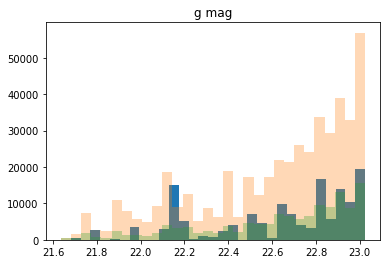

In [598]:
#gs22 = gs
#gls22 =gls
p =  plt.hist(gs21,bins = 30)
#p = plt.hist(gls,bins = 30,normed = True, alpha = 0.5)
plt.title('g mag')
#p = plt.hist(dat_f['g'],bins = 30,normed = True, alpha = 0.5)

p = plt.hist(gs22,bins = 30,alpha = 0.3)
#p = plt.hist(gls,bins = 30,normed = True, alpha = 0.5)

p = plt.hist(gs23,bins = 30,alpha = 0.3)
#p = plt.hist(gls,bins = 30,normed = True, alpha = 0.5)

Text(0.5,1,'-0.068*rz+0.457-gr')

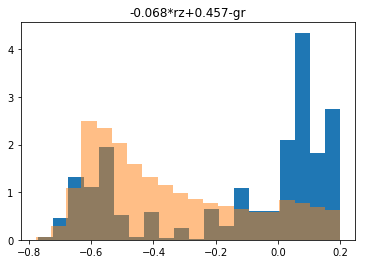

In [437]:
p = plt.hist(-0.068*rzs21+0.457-grs21,bins=20,normed = True)
p = plt.hist(-0.068*rzls+0.457-grls,bins=20,alpha=0.5,normed = True)
plt.title('-0.068*rz+0.457-gr')
#p = plt.hist(-0.068*rzs22+0.457-grs22,bins=20,alpha=0.5,normed = True)
#p = plt.hist(-0.068*rzls21+0.457-grls21,bins=20,alpha=0.5,normed = True)

#p = plt.hist(-0.068*rzs23+0.457-grs23,bins=20,alpha=0.5,normed = True)
#p = plt.hist(-0.068*rzls21+0.457-grls21,bins=20,alpha=0.5,normed = True)

Text(0.5,1,'0.112*rz+0.773-gr')

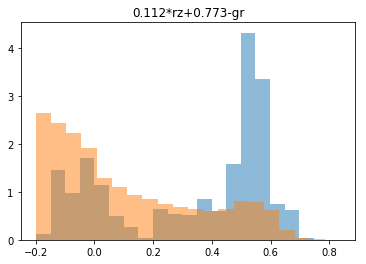

In [438]:
p = plt.hist(0.112*rzs21+0.773-grs21,bins=20,normed = True,alpha=0.5)
p = plt.hist(0.112*rzls+0.773-grls,bins=20,normed = True,alpha=0.5)
plt.title('0.112*rz+0.773-gr')
#p = plt.hist(0.112*rzs22+0.773-grs22,bins=20,normed = True,alpha=0.5)
#p = plt.hist(0.112*rzls22+0.773-grls22,bins=20,normed = True,alpha=0.5)

#p = plt.hist(0.112*rzs23+0.773-grs23,bins=20,normed = True,alpha=0.5)
#p = plt.hist(0.112*rzls23+0.773-grls23,bins=20,normed = True,alpha=0.5)

Text(0.5,1,'0.218*gr+0.571-rz')

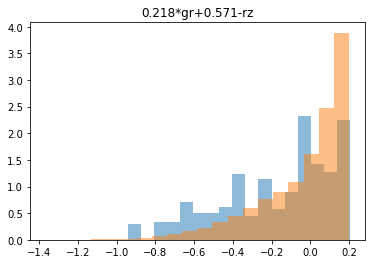

In [439]:
p = plt.hist(0.218*grs21+0.571-rzs21,bins=20,normed = True,alpha=0.5)
p = plt.hist(0.218*grls+0.571-rzls,bins=20,normed = True,alpha=0.5)
plt.title('0.218*gr+0.571-rz')
#p = plt.hist(0.218*grs22+0.571-rzs22,bins=20,normed = True,alpha=0.5)
#p = plt.hist(0.218*grls22+0.571-rzls22,bins=20,normed = True,alpha=0.5)

#p = plt.hist(0.218*grs23+0.571-rzs23,bins=20,normed = True,alpha=0.5)
#p = plt.hist(0.218*grls23+0.571-rzls23,bins=20,normed = True,alpha=0.5)

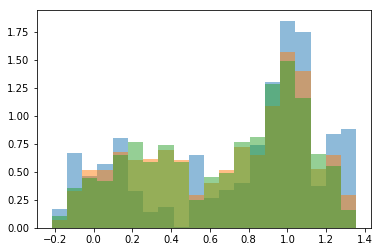

In [269]:
p = plt.hist(-0.555*grs21+1.901-rzs21,bins=20,normed = True,alpha=0.5)
#p = plt.hist(-0.555*grls+1.901-rzls,bins=20,normed = True,alpha=0.5)

p = plt.hist(-0.555*grs22+1.901-rzs22,bins=20,normed = True,alpha=0.5)
#p = plt.hist(-0.555*grls+1.901-rzls,bins=20,normed = True,alpha=0.5)

p = plt.hist(-0.555*grs23+1.901-rzs23,bins=20,normed = True,alpha=0.5)
#p = plt.hist(-0.555*grls+1.901-rzls,bins=20,normed = True,alpha=0.5)

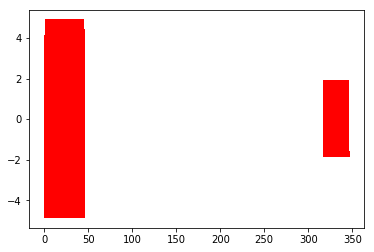

In [271]:
fn = topdir+'sim_subset_dr5_200per.fits'
dat = fits.getdata(fn)
plt.plot(dat['ra'],dat['dec'],'r,')

In [273]:
dat_sel = dat[dat['ra']>200]

In [282]:
def select_non_ELG_sim( tractor , region = 'sgc'):
    import numpy as n
    # the color color selection
    g     = tractor['g']
    r_mag = tractor['r']
    z_mag = tractor['z']
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(color_sgc)
    selection_ngc =(color_ngc)
    # returns the catalogs of ELGs
    if region == 'sgc':
            return tractor[selection_sgc==False]
    if region == 'ngc':
            return tractor[selection_ngc==False]

In [283]:
dat_f = select_non_ELG_sim(dat_sel)

In [363]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.table import Table, hstack

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn_dr3_elg_like = topdir+'elg_like_contamination_chunk21.fits'
fn_sim_contamination = topdir+'sgc_run_sim_really_masked_chunk21.fits'
dr3_elg_like = fits.getdata(fn_dr3_elg_like)
sim_contamination = fits.getdata(fn_sim_contamination)
elg_like_g = 22.5 - 2.5 * np.log10(dr3_elg_like['decam_flux'].transpose()[1]/dr3_elg_like['decam_mw_transmission'].transpose()[1])
elg_like_r = 22.5 - 2.5 * np.log10(dr3_elg_like['decam_flux'].transpose()[2]/dr3_elg_like['decam_mw_transmission'].transpose()[2])
elg_like_z = 22.5 - 2.5 * np.log10(dr3_elg_like['decam_flux'].transpose()[4]/dr3_elg_like['decam_mw_transmission'].transpose()[4])
elg_like_gr = elg_like_g - elg_like_r
elg_like_rz = elg_like_r - elg_like_z
data_elg_like = np.vstack((elg_like_g, elg_like_gr, elg_like_rz))
values_elg_like = data_elg_like
kde_elg_like = stats.gaussian_kde(values_elg_like)

sim_g = 22.5 - 2.5 * np.log10(sim_contamination['gflux']/sim_contamination['mw_transmission_g'])
sim_r = 22.5 - 2.5 * np.log10(sim_contamination['rflux']/sim_contamination['mw_transmission_r'])
sim_z = 22.5 - 2.5 * np.log10(sim_contamination['zflux']/sim_contamination['mw_transmission_z'])
sim_gr = sim_g - sim_r
sim_rz = sim_r - sim_z
data_sim = np.vstack((sim_g,sim_gr,sim_rz))
values_sim = data_sim
kde_sim = stats.gaussian_kde(values_sim)

In [354]:
%timeit 1
density_elg_like = kde_elg_like(values_sim[:,0:1000])
density_sim = kde_sim(values_sim[:,0:1000])

6.83 ns ± 0.214 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [357]:
weight = density_elg_like/density_sim*(0.816040793397001/0.3785832163485753)
tab_weight = Table(fits.BinTableHDU.from_columns(\
            fits.ColDefs([\
            fits.Column(name='weight',format='D',array=weight)])).data)
tab_origin = Table(sim_contamination)[:1000]
table_final = hstack((tab_origin,tab_weight))
#table_final.write('xxx_weighed_part1.fits')

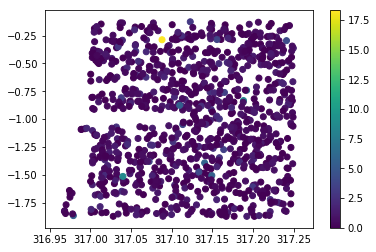

In [358]:
#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = table_final['ra'],table_final['dec'],table_final['weight']
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

In [333]:
len(table_final['ra'][0:100])

99

In [343]:
len(weight)

100

In [344]:
len(table_final['ra'][0:100])

100

In [356]:
len(values_sim[0])

296635

In [364]:
len(sim_contamination)

373268

In [365]:
len(values_sim[0])

373268

In [371]:
a = np.array([i for i in range(31)])
c = np.array_split(a,10)

In [379]:
c[9][0],c[9][-1]

(28, 30)

In [380]:
a[30]

30

In [373]:
task = np.arange(30)

In [374]:
task

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [467]:
fn_kde = topdir+'kde_outputs2/sim_kde_weighed_chunk21.fits'
dat_kde = fits.getdata(fn_kde)
dat_kde.columns
len(dat_kde)

141313

In [452]:
g1 = 22.5 - 2.5 * np.log10(dat_kde['gflux']/dat_kde['mw_transmission_g'])
r1 = 22.5 - 2.5 * np.log10(dat_kde['rflux']/dat_kde['mw_transmission_r'])
z1 = 22.5 - 2.5 * np.log10(dat_kde['zflux']/dat_kde['mw_transmission_z'])
gr1 = g1-r1
rz1 = r1-z1

In [453]:
g2 = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[1]/DDDAT['decam_mw_transmission'].transpose()[1])
r2 = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[2]/DDDAT['decam_mw_transmission'].transpose()[2])
z2 = 22.5 - 2.5 * np.log10(DDDAT['decam_flux'].transpose()[4]/DDDAT['decam_mw_transmission'].transpose()[4])
gr2 = g2-r2
rz2 = r2-z2

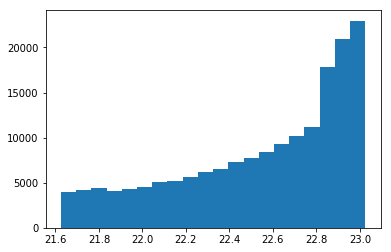

In [454]:
_,bins,_=plt.hist(g2,bins=20)

In [404]:
bins

array([ 21.62501907,  21.69501801,  21.76501694,  21.83501587,
        21.9050148 ,  21.97501373,  22.04501266,  22.1150116 ,
        22.18501053,  22.25500946,  22.32500839,  22.39500732,
        22.46500626,  22.53500519,  22.60500412,  22.67500305,
        22.74500198,  22.81500092,  22.88499985,  22.95499878,  23.02499771])

In [455]:
intev = (23.02499771-21.62501907)/20
(23.02-21.62501907)/intev

19.92860305354371

In [456]:
binning = np.zeros(20)
for i in range(len(dat_kde)):
    bin_num = int((g1[i]-21.62501907)/intev)
    if bin_num>=0 and bin_num<20:
        binning[bin_num]+=dat_kde['weight'][i]
    else:
        print(i)

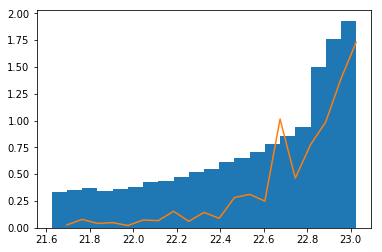

In [460]:
_,BINS,_=plt.hist(g2,bins=20,normed=True)
#p = plt.hist(g1,bins=BINS,alpha=0.5)
plt.plot(bins[:-1]+intev,8*binning/binning.sum())

In [461]:
binning = np.zeros(20)
for i in range(len(dat_kde)):
    bin_num = int((gr1[i]-0.14339447)/intev_gr2)
    if bin_num>=0 and bin_num<20:
        binning[bin_num]+=dat_kde['weight'][i]
    else:
        print(i)

Text(0.5,1,'dist in gr')

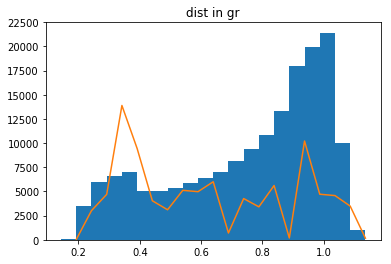

In [463]:
_,bins_gr2,_ = plt.hist(gr2,bins=20)
plt.plot(bins_gr2[:-1]+intev_gr2,binning*3)
plt.title('dist in gr')

In [421]:
bins_gr2

array([ 0.14339447,  0.19300852,  0.24262257,  0.29223661,  0.34185066,
        0.39146471,  0.44107876,  0.49069281,  0.54030685,  0.5899209 ,
        0.63953495,  0.689149  ,  0.73876305,  0.78837709,  0.83799114,
        0.88760519,  0.93721924,  0.98683329,  1.03644733,  1.08606138,
        1.13567543])

In [422]:
intev_gr2 = (1.13567543-0.14339447)/20

Text(0.5,1,'rz')

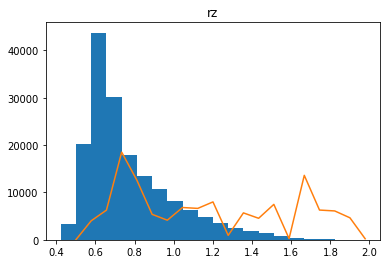

In [466]:
_,bins_rz2,_ = plt.hist(rz2,bins=20)
plt.plot(bins_rz2[:-1]+intev_rz,binning*4)
plt.title('rz')

In [427]:
bins_rz2

array([ 0.42299461,  0.50074024,  0.57848587,  0.6562315 ,  0.73397713,
        0.81172276,  0.88946838,  0.96721401,  1.04495964,  1.12270527,
        1.2004509 ,  1.27819653,  1.35594215,  1.43368778,  1.51143341,
        1.58917904,  1.66692467,  1.7446703 ,  1.82241592,  1.90016155,
        1.97790718])

In [428]:
intev_rz = (1.97790718-0.42299461)/20

In [431]:
binning = np.zeros(20)
for i in range(len(dat_kde)):
    bin_num = int((rz1[i]-0.42299461)/intev_rz)
    if bin_num>=0 and bin_num<20:
        binning[bin_num]+=dat_kde['weight'][i]
    else:
        print(i)

In [440]:
dat_kde['weight'].sum()

129410.07946037888

In [441]:
len(dat_kde)

373168

array([ 0.00289752,  0.18727419,  0.01754534, ...,  0.09232511,
        1.57584268,  0.7930662 ])

In [444]:
fn_sim_chunk21 = topdir+'sgc_run_sim_really_masked_chunk21.fits'
sim = fits.getdata(fn_sim_chunk21)
len(sim)

373268

In [468]:
len(dat_kde)#contamination

141313

In [474]:
#chunk21
fn_sim_chunk21 = topdir+'sgc_run_sim_really_masked_chunk21.fits'
sim = fits.getdata(fn_sim_chunk21)
sim_non_ELG = select_non_ELG(fn_sim_chunk21)
print(len(sim_non_ELG),len(sim),len(sim_non_ELG)/len(sim),dat_kde['weight'].sum())

141313 373268 0.3785832163485753 30561.9802366


In [475]:
print(len(dat_sel_2_non_ELG)/len(dat_sel_2))

0.816040793397001


In [477]:
(373268-141313)/(1-0.816040793397001)*0.816040793397001

1028949.5466290815

In [478]:
1028949.5466290815/30561.9802366

33.66763340147855

In [479]:
33.66763340147855*dat_kde['weight'].sum()

1028949.546627596

In [482]:
33.66763340147855*dat_kde['weight'].sum()/(len(sim)-len(sim_non_ELG)+33.66763340147855*dat_kde['weight'].sum())

0.81604079339678426

In [485]:
hdu = fits.BinTableHDU.from_columns(fits.ColDefs([fits.Column(name = 'new_weight',format='D',array=33.66763340147855*dat_kde['weight'])]))

In [487]:
from astropy.table import Table,hstack
tab = Table(hdu.data)

In [497]:
new_tab = hstack((Table(dat_kde),tab))

In [511]:
topdir

'/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'

In [512]:
new_tab.write(topdir+'kde_weighed_sim_chunk21.fits')

In [580]:
def non_ELG_selection_for_dr3(dat,region='sgc'):
    # opens the tractor file
    import numpy as n
    from astropy.table import Table
    tractor=dat
    
    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
            return Table(tractor[selection_sgc.astype(bool)==False])
    if region == 'ngc':
            return Table(tractor[selection_ngc.astype(bool)==False])

In [581]:
dat_elg = non_ELG_selection_for_dr3(dat_sel_2)

In [582]:
len(dat_elg)

169956

In [583]:
len(dat_sel_2)-len(dat_sel_2_non_ELG)

38313

In [584]:
len(dat_sel_2_non_ELG)

169956

In [509]:
38313/0.2*0.8

153252.0

In [520]:
obiwan_elg = fits.getdata(topdir+'sgc_run_obiwan_really_masked_chunk21.fits')


In [517]:
#new_tab: my matched sim

In [518]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [532]:
c1 = SkyCoord(ra=obiwan_elg['ra']*u.degree, dec=obiwan_elg['dec']*u.degree)
c2 = SkyCoord(ra=new_tab['ra']*u.degree, dec=new_tab['dec']*u.degree)

In [533]:
idx, d2d, d3d = c1.match_to_catalog_sky(c2)

In [534]:
w = d2d.value <= 1.5/3600.

In [577]:
idx[~w] = -1

In [578]:
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]
#print(len(idx2[idx1]), len(new_tab[idx2]))

In [579]:
len(idx1)

106809

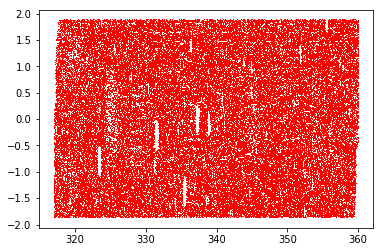

In [575]:
dddd = obiwan_elg[idx1]
plt.plot(dddd['ra'],dddd['dec'],'r,')

In [540]:
idx2,len(new_tab)

(array([    32,     39,     33, ..., 141269, 141256, 141279]), 141313)

In [536]:
obiwan_weight = np.ones(len(obiwan_elg))

In [566]:
for i in range(len(idx1)):
    obiwan_weight[idx1[i]] = 2.15

In [567]:
len(obiwan_weight),len(new_tab)

(110461, 141313)

In [568]:
len(obiwan_weight),len(obiwan_elg)

(110461, 110461)

In [569]:
obiwan_weight_tab = Table(fits.BinTableHDU.from_columns(fits.ColDefs([fits.Column(\
                    name='kde_weight',format='D',array = obiwan_weight)])).data)

In [570]:
final_tab = hstack((Table(obiwan_elg),obiwan_weight_tab))

In [572]:
final_tab.write(topdir+'sgc_run_obiwan_really_masked_chunk21_simple_weight.fits')

In [544]:
len(idx1)

5624

In [545]:
5624/110461

0.05091389721259087

In [547]:
fn_sim_chunk21 = topdir+'sgc_run_sim_really_masked_chunk21.fits'
sim = fits.getdata(fn_sim_chunk21+'')

In [548]:
len(sim)

373268

In [552]:
c1 = SkyCoord(ra=obiwan_elg['ra']*u.degree, dec=obiwan_elg['dec']*u.degree)
c2 = SkyCoord(ra=sim['ra']*u.degree, dec=sim['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 2/3600.
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]
distance = d2d.value[w]

In [553]:
len(idx1)

106809

In [554]:
len(obiwan_elg)

110461

In [ ]:
0.81604079339678426

In [564]:
141313/373268

0.3785832163485753

In [565]:
1/0.3785832163485753*0.81604079339678426

2.155512336937372